In [5]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import pickle

df = pd.read_csv("RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
df.shape

(12316, 32)

In [9]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [11]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [25]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,Female,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,Female,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,Female,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,Female,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,Female,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,Female,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [27]:
df.Road_allignment.value_counts()

Road_allignment
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64

In [29]:
df.shape

(12316, 32)

In [31]:
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace({
    'na': 'Female',
})

In [33]:
df.Sex_of_casualty.value_counts()

Sex_of_casualty
Female    7063
Male      5253
Name: count, dtype: int64

In [35]:
j    'Illiterate': 'Writing & reading',
    'Unknown': 'Writing & reading'
})

In [37]:
df.Educational_level .value_counts()

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      321
Name: count, dtype: int64

In [39]:
df['Casualty_severity'] = df['Casualty_severity'].replace({
    'na': '1',
})

In [41]:
df.Casualty_severity.value_counts() 

Casualty_severity
3    7076
1    4469
2     771
Name: count, dtype: int64

In [111]:
df.Age_band_of_driver.value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [113]:
df.Vehicle_driver_relation.value_counts()

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

In [115]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace({
    'na': 'Under 18',
    '5': 'Over 51'
})

In [49]:
df.Age_band_of_casualty.value_counts()

Age_band_of_casualty
Under 18    5478
18-30       3145
31-50       2455
Over 51     1238
Name: count, dtype: int64

In [51]:
df['Driving_experience'] = df['Driving_experience'].replace({
    'unknown': 'No Licence'
})

In [53]:
df. Driving_experience.value_counts()

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     151
Name: count, dtype: int64

In [55]:
df. Type_of_vehicle  .value_counts()

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [57]:
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].replace({
    'Other': 'Organization',
})

In [59]:
df. Owner_of_vehicle    .value_counts()

Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      334
Name: count, dtype: int64

In [61]:
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace({
    'Unknown': 'Below 1yr',
})

In [63]:
df. Service_year_of_vehicle .value_counts()

Service_year_of_vehicle
Below 1yr     3165
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Name: count, dtype: int64

In [65]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].replace({
    '5': 'Defect',
    '7': 'Defect'
})

In [67]:
df. Defect_of_vehicle.value_counts()

Defect_of_vehicle
No defect    7777
Defect        112
Name: count, dtype: int64

In [69]:
df. Area_accident_occured .value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [71]:
df. Road_surface_type    .value_counts()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64

In [73]:
df. Lanes_or_Medians .value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64

In [75]:
df.Accident_severity.value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

In [77]:
df_dropped=df.drop(columns=[ 'Time','Day_of_week', 'Educational_level','Work_of_casuality','Owner_of_vehicle'])

In [79]:
df_dropped

,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Employee,1-2yr,Automobile,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,...,2,Going straight,na,Female,Under 18,1,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Male,Employee,Above 10yr,Public (> 45 seats),5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,...,2,Going straight,na,Female,Under 18,1,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Male,Employee,1-2yr,Lorry (41?100Q),NaN,No defect,Recreational areas,other,NaN,...,2,Going straight,Driver or rider,Male,31-50,3,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Male,Employee,5-10yr,Public (> 45 seats),NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,...,2,Going straight,Pedestrian,Female,18-30,3,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Male,Employee,2-5yr,NaN,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,...,2,Going straight,na,Female,Under 18,1,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Employee,2-5yr,Lorry (11?40Q),NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,...,1,Going straight,na,Female,Under 18,1,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Unknown,Male,Employee,5-10yr,Automobile,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,...,1,Other,na,Female,Under 18,1,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Over 51,Male,Employee,5-10yr,Bajaj,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,...,1,Other,Driver or rider,Male,31-50,3,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,18-30,Female,Employee,Above 10yr,Lorry (41?100Q),2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,...,1,Other,na,Female,Under 18,1,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [81]:
df_dropped['Vehicle_driver_relation'].fillna("Unknown",inplace=True)

In [83]:
df_dropped['Driving_experience'].fillna("unknown",inplace=True)

In [85]:
df_dropped['Type_of_vehicle'].fillna("Bicycle",inplace=True)

In [87]:
df_dropped['Service_year_of_vehicle'].fillna("Below 1yr ",inplace=True)

In [89]:
df_dropped['Defect_of_vehicle'].fillna("5",inplace=True)

In [91]:
df_dropped['Area_accident_occured'].fillna("Recreational areas ",inplace=True)

In [93]:
df_dropped['Road_surface_type'].fillna("Asphalt roads with some distress ",inplace=True)

In [95]:
df_dropped.isnull().sum()

Age_band_of_driver                0
Sex_of_driver                     0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Service_year_of_vehicle           0
Defect_of_vehicle                 0
Area_accident_occured             0
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

In [97]:
df_dropped['Lanes_or_Medians'].fillna("Unknown",inplace=True)

In [99]:
df. Fitness_of_casuality  .value_counts()

Fitness_of_casuality
Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: count, dtype: int64

In [101]:
df_dropped['Fitness_of_casuality'].fillna("Blind",inplace=True)

In [103]:
df. Road_allignment .value_counts()

Road_allignment
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64

In [105]:
df_dropped['Road_allignment'].fillna("Steep grade upward with mountainous terrain ",inplace=True)

In [107]:
df.Types_of_Junction .value_counts()

Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

In [109]:
df_dropped['Types_of_Junction'].fillna(" X Shape",inplace=True)

In [48]:
df.Vehicle_movement   .value_counts()

Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64

In [49]:
df_dropped['Vehicle_movement'].fillna("Parked",inplace=True)

In [50]:
df. Type_of_collision    .value_counts()

Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [51]:
df_dropped['Type_of_collision'].fillna("ith Train",inplace=True)

In [52]:
df_dropped.isnull().sum()

Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

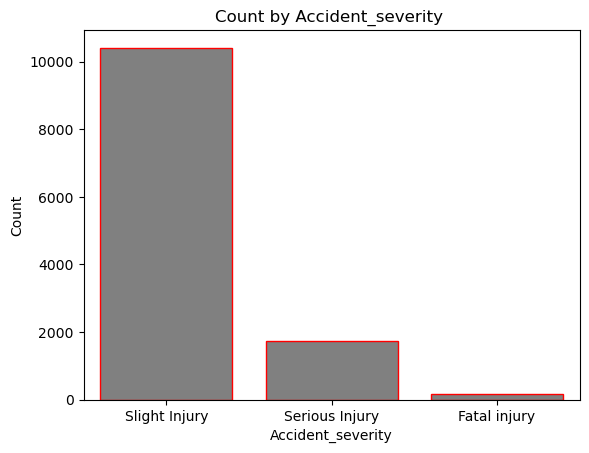

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.countplot(x='Accident_severity',data=df,color='grey',edgecolor='red')
plt.title('Count by Accident_severity ')
plt.xlabel('Accident_severity')
plt.ylabel('Count')
plt.show()

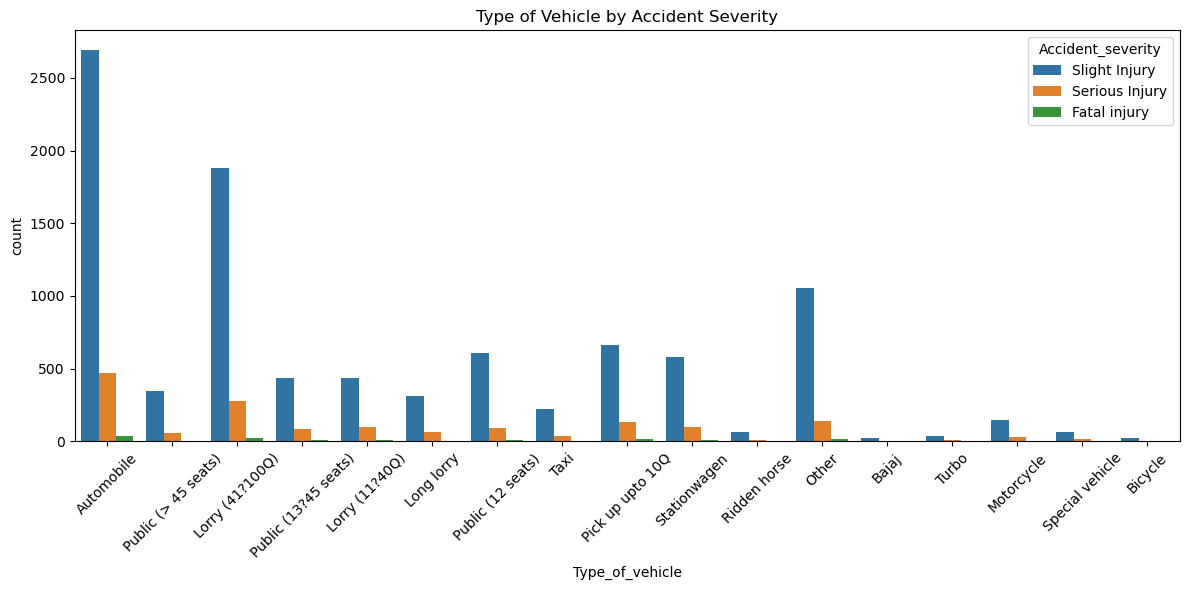

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type_of_vehicle', hue='Accident_severity', data=df)
plt.title('Type of Vehicle by Accident Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

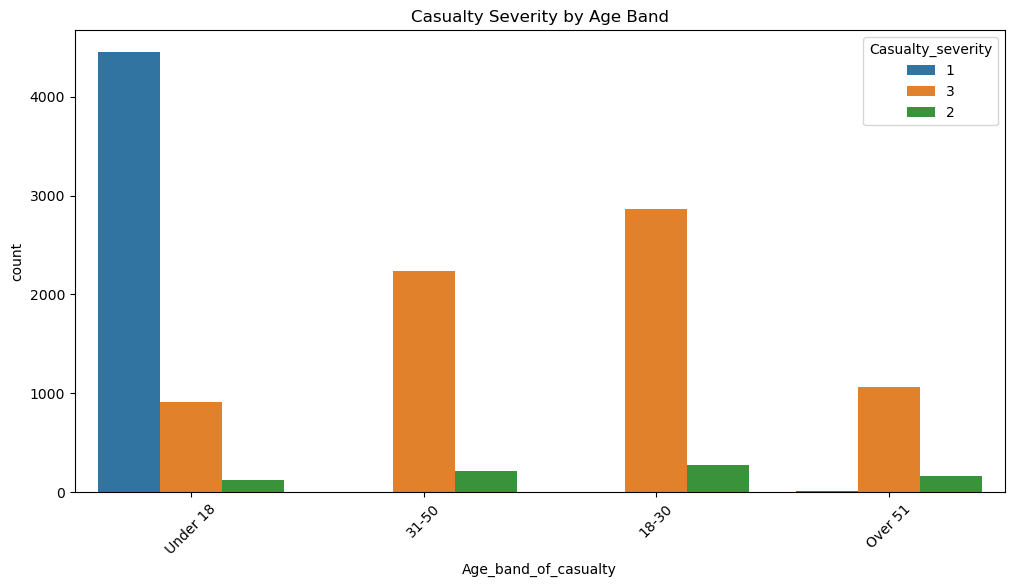

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age_band_of_casualty', hue='Casualty_severity')
plt.title("Casualty Severity by Age Band")
plt.xticks(rotation=45)
plt.show()


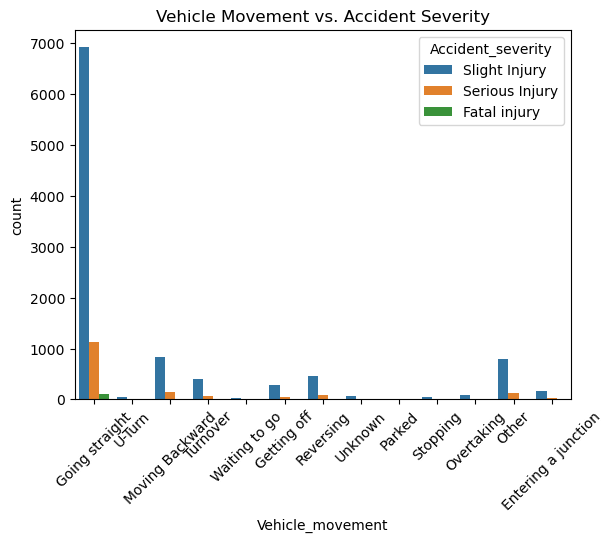

In [56]:
sns.countplot(data=df, x='Vehicle_movement', hue='Accident_severity')
plt.title("Vehicle Movement vs. Accident Severity")
plt.xticks(rotation=45)
plt.show()


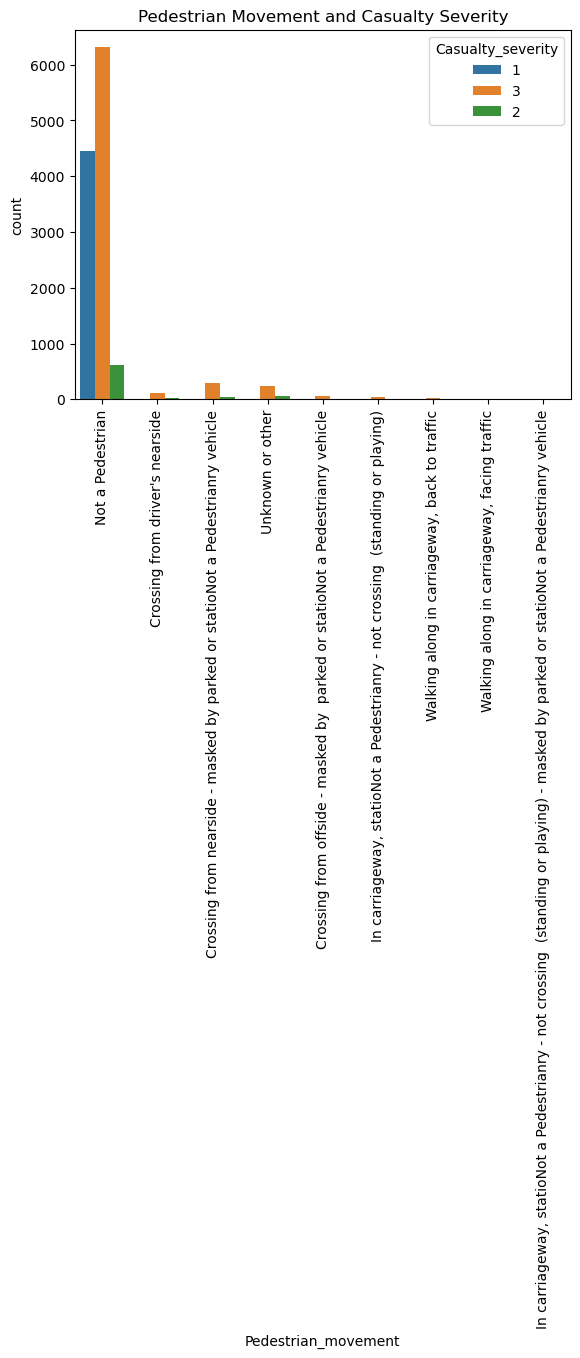

In [57]:
sns.countplot(data=df, x='Pedestrian_movement', hue='Casualty_severity')
plt.title("Pedestrian Movement and Casualty Severity")
plt.xticks(rotation=90)
plt.show()


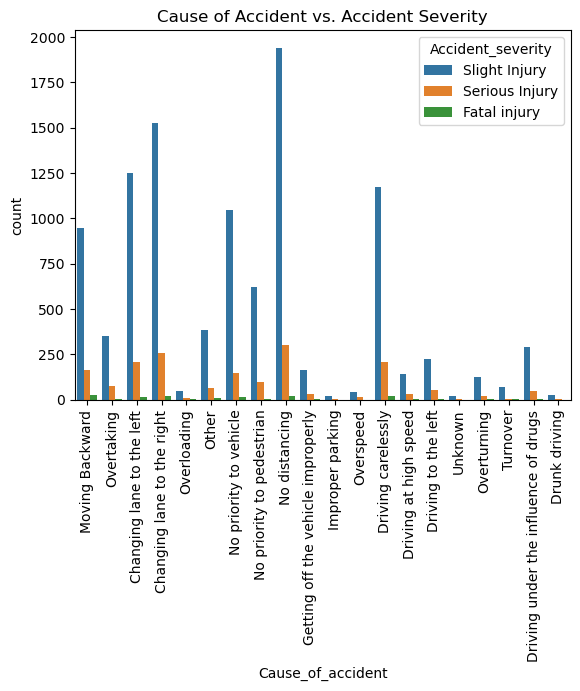

In [58]:
sns.countplot(data=df, x='Cause_of_accident', hue='Accident_severity')
plt.title("Cause of Accident vs. Accident Severity")
plt.xticks(rotation=90)
plt.show()


In [59]:
from sklearn.preprocessing import LabelEncoder

cols = ['Age_band_of_driver','Vehicle_driver_relation','Driving_experience','Type_of_vehicle',
        'Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians',
        'Road_allignment','Types_of_Junction','Number_of_vehicles_involved','Number_of_casualties',
        'Vehicle_movement','Casualty_class','Age_band_of_casualty','Casualty_severity',
        'Fitness_of_casuality','Pedestrian_movement','Cause_of_accident','Accident_severity',
        'Sex_of_driver','Sex_of_casualty']



In [60]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset to avoid modifying original
df_encoded = df.copy()

# Apply LabelEncoder to each column in the list
le = LabelEncoder()
for col in cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


le = LabelEncoder()

cols = df_dropped.select_dtypes(include=['object']).columns  # Select columns with string/object type
for col in cols:
    df_dropped[col] = le.fit_transform(df_dropped[col].astype(str)) 

In [61]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [62]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Drop non-numeric columns (e.g., 'Time') if not encoded
# Optional: extract hour from 'Time' column if useful, otherwise drop
if 'Time' in X.columns:
    X = X.drop(columns=['Time'])

# Step 2: Ensure all features are numeric (important before SMOTE)
X = X.apply(pd.to_numeric, errors='coerce')  # Converts or sets non-numeric to NaN
X = X.fillna(-1)  # Fill any resulting NaNs

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 5: Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5369318181818182
Confusion Matrix:
 [[   6    8   17]
 [  27  123  199]
 [ 196  694 1194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.19      0.05        31
           1       0.15      0.35      0.21       349
           2       0.85      0.57      0.68      2084

    accuracy                           0.54      2464
   macro avg       0.34      0.37      0.31      2464
weighted avg       0.74      0.54      0.61      2464



In [63]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [64]:
pg={"n_neighbors":np.arange(1,30)}
gsm1=GridSearchCV(knn,param_grid=pg)
gsm1.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [65]:
y_predict = gsm1.predict(X_test)

In [66]:
conf_matrix=confusion_matrix(y_predict,y_pred)
print(conf_matrix)

[[  98    2    1]
 [  18  479   82]
 [ 113  344 1327]]


In [67]:

c_report=classification_report(y_predict,y_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.43      0.97      0.59       101
           1       0.58      0.83      0.68       579
           2       0.94      0.74      0.83      1784

    accuracy                           0.77      2464
   macro avg       0.65      0.85      0.70      2464
weighted avg       0.84      0.77      0.79      2464



In [68]:

from sklearn.naive_bayes import GaussianNB

In [69]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [70]:

y_predict=model.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [72]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.02      0.26      0.03        31
           1       0.15      0.23      0.18       349
           2       0.85      0.58      0.69      2084

    accuracy                           0.53      2464
   macro avg       0.34      0.36      0.30      2464
weighted avg       0.74      0.53      0.61      2464



In [73]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [74]:

par_G={'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5]}
gsm=GridSearchCV(estimator=model, param_grid=par_G, scoring='f1_macro', cv=5)
gsm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='f1_macro')

In [75]:
y1_predict=gsm.predict(X_test)

In [76]:
class_report=classification_report(y_test,y1_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.02      0.26      0.03        31
           1       0.15      0.23      0.18       349
           2       0.85      0.58      0.69      2084

    accuracy                           0.53      2464
   macro avg       0.34      0.36      0.30      2464
weighted avg       0.74      0.53      0.61      2464



In [77]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [78]:
lg.fit(X_train,y_train)

LogisticRegression()

In [79]:
lg_p=lg.predict(X_test)

In [80]:
lg_m=confusion_matrix(lg_p,y_test)
print(lg_m)

[[   8   45  213]
 [   3   90  424]
 [  20  214 1447]]


In [81]:
c_report=classification_report(lg_p,y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.26      0.03      0.05       266
           1       0.26      0.17      0.21       517
           2       0.69      0.86      0.77      1681

    accuracy                           0.63      2464
   macro avg       0.40      0.35      0.34      2464
weighted avg       0.56      0.63      0.57      2464



In [82]:
pg={"max_iter":[100,200]}
gsm3=GridSearchCV(lg,pg)
gsm3.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200]})

In [83]:
y_predict=gsm3.predict(X_test)

In [84]:
lg_m=confusion_matrix(y_predict,y_test)
print(lg_m)

[[   8   46  208]
 [   3   90  432]
 [  20  213 1444]]


In [85]:
c_report=classification_report(y_predict,y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.26      0.03      0.05       262
           1       0.26      0.17      0.21       525
           2       0.69      0.86      0.77      1677

    accuracy                           0.63      2464
   macro avg       0.40      0.35      0.34      2464
weighted avg       0.55      0.63      0.57      2464



In [86]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [87]:
model2=DecisionTreeClassifier(random_state=0)

In [88]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [89]:
y2_predict=model2.predict(X_test)

In [90]:
model21=confusion_matrix(y2_predict,y_test)
print(model21)

[[   3    9   83]
 [   7  106  488]
 [  21  234 1513]]


In [91]:
c_report=classification_report(y2_predict,y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.10      0.03      0.05        95
           1       0.30      0.18      0.22       601
           2       0.73      0.86      0.79      1768

    accuracy                           0.66      2464
   macro avg       0.38      0.35      0.35      2464
weighted avg       0.60      0.66      0.62      2464



In [92]:
cn=[str(cls) for cls in model2.classes_]

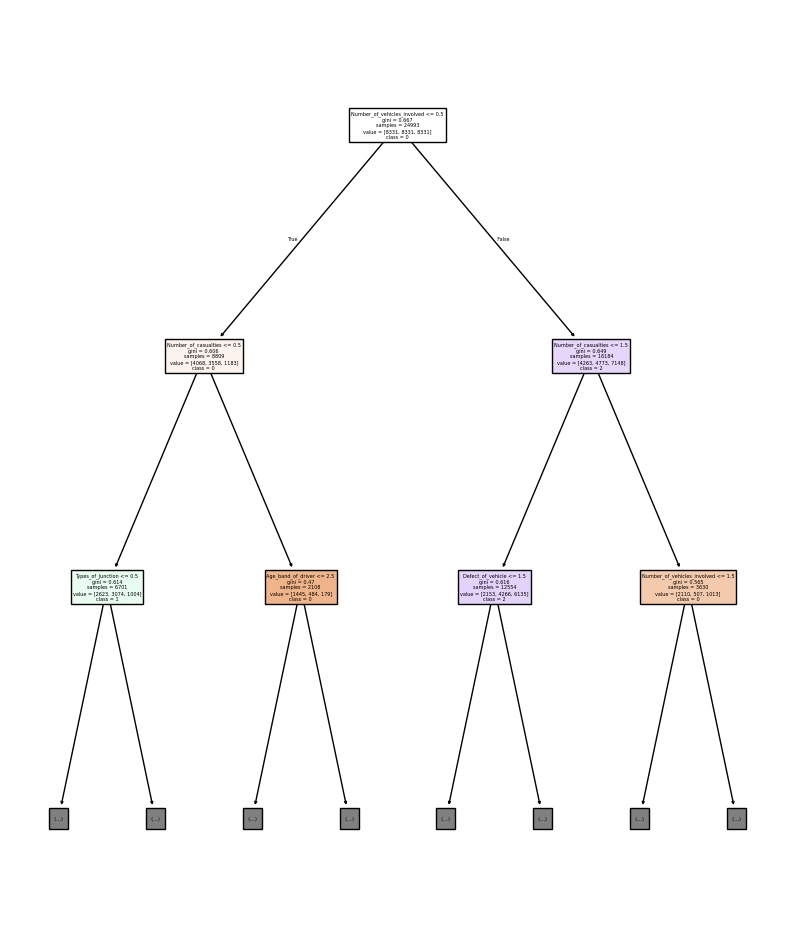

In [93]:
plt.figure(figsize=(10,12))
plot_tree(model2,filled=True,feature_names=X_train.columns,class_names=cn,max_depth=2)
plt.show()

In [94]:
pg={'criterion':['gini','entropy'],'max_depth':[None,10,20,30,40,50],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
gsm2=GridSearchCV(estimator=model2,param_grid=pg)
gsm2.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [95]:
y4_predict=gsm2.predict(X_test)

In [96]:
model21=confusion_matrix(y4_predict,y_test)
print(model21)

[[   2   15   74]
 [   7   99  522]
 [  22  235 1488]]


In [97]:
c_report=classification_report(y4_predict,y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.06      0.02      0.03        91
           1       0.28      0.16      0.20       628
           2       0.71      0.85      0.78      1745

    accuracy                           0.64      2464
   macro avg       0.35      0.34      0.34      2464
weighted avg       0.58      0.64      0.60      2464



In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
model4=RandomForestClassifier(n_estimators=15)

In [100]:
model4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15)

In [101]:

y3_predict=model4.predict(X_test)

In [102]:
model41=confusion_matrix(y3_predict,y_test)
print(model41)

[[   1    2   19]
 [   4   69  271]
 [  26  278 1794]]


In [103]:
c_report=classification_report(y3_predict,y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.03      0.05      0.04        22
           1       0.20      0.20      0.20       344
           2       0.86      0.86      0.86      2098

    accuracy                           0.76      2464
   macro avg       0.36      0.37      0.36      2464
weighted avg       0.76      0.76      0.76      2464



In [104]:
pg={'criterion':['gini','entropy'],'max_depth':[None,10,20,30,40,50],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
gsm4=GridSearchCV(estimator=model4,param_grid=pg)
gsm4.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=15),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [105]:
y5_predict=gsm4.predict(X_test)

In [106]:
model=confusion_matrix(y5_predict,y_test)
print(model)

[[   1    3   26]
 [   2   71  261]
 [  28  275 1797]]


In [107]:
c_report=classification_report(y5_predict,y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.03      0.03      0.03        30
           1       0.20      0.21      0.21       334
           2       0.86      0.86      0.86      2100

    accuracy                           0.76      2464
   macro avg       0.37      0.37      0.37      2464
weighted avg       0.76      0.76      0.76      2464



In [108]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)


SVC()

In [109]:
y_pred=classifier.predict(X_test)

In [110]:
model5=confusion_matrix(y_pred,y_test)
print(model5)

[[   7   33  159]
 [   2   86  422]
 [  22  230 1503]]


In [111]:
cl_report=classification_report(y_pred,y_test)
print(cl_report)

              precision    recall  f1-score   support

           0       0.23      0.04      0.06       199
           1       0.25      0.17      0.20       510
           2       0.72      0.86      0.78      1755

    accuracy                           0.65      2464
   macro avg       0.40      0.35      0.35      2464
weighted avg       0.58      0.65      0.60      2464



pg={'C':[0.1,1,1,10],'kernel':['linear']}
gsm5=GridSearchCV(estimator=classifier,param_grid=pg,cv=5)
gsm5.fit(X_train,y_train)

In [113]:
from sklearn.ensemble import BaggingClassifier


In [114]:
BE=DecisionTreeClassifier(random_state=0)

In [115]:
 bcm=BaggingClassifier(estimator=BE,n_estimators=10,random_state=0)

In [117]:
bcm.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0),
                  random_state=0)

In [121]:
y_predict=bcm.predict(X_test)


In [125]:
cl_report=classification_report(y6_predict,y_test)
print(cl_report)

              precision    recall  f1-score   support

           0       0.06      0.04      0.05        55
           1       0.31      0.22      0.25       495
           2       0.79      0.86      0.83      1914

    accuracy                           0.72      2464
   macro avg       0.39      0.37      0.38      2464
weighted avg       0.68      0.72      0.69      2464



In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [159]:
gbm=GradientBoostingClassifier(n_estimators=10,learning_rate=0.1,random_state=0)

In [161]:
gbm.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=0)

In [163]:
y6_predict=gbm.predict(X_test)

In [165]:
model4=confusion_matrix(y6_predict,y_test)
print(model4)

[[  10   44  244]
 [   6  117  553]
 [  15  188 1287]]


In [167]:
cl_report=classification_report(y6_predict,y_test)
print(cl_report)

              precision    recall  f1-score   support

           0       0.32      0.03      0.06       298
           1       0.34      0.17      0.23       676
           2       0.62      0.86      0.72      1490

    accuracy                           0.57      2464
   macro avg       0.43      0.36      0.34      2464
weighted avg       0.50      0.57      0.51      2464



In [183]:
import pandas as pd

data = {
    "algorithms": ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'SVM', 'Random Forest', 'Gradient Boosting', 'Bagging Classifier'],
    "accuracy(%)": [52, 69, 52, 47, 48, 78, 65, 69],
    "precision(%)": [44, 41, 37, 35, 38, 36, 49, 41],
    "recall(%)": [35, 38, 45, 37, 35, 36, 38, 38],
    "f1_score(%)": [32, 39, 33, 28, 27, 36, 38, 39]
}

data = pd.DataFrame(data)
data1 = data.copy()  # Optional if you want another reference

print(data)


            algorithms  accuracy(%)  precision(%)  recall(%)  f1_score(%)
0  Logistic Regression           52            44         35           32
1        Decision Tree           69            41         38           39
2                  KNN           52            37         45           33
3          Naive Bayes           47            35         37           28
4                  SVM           48            38         35           27
5        Random Forest           78            36         36           36
6    Gradient Boosting           65            49         38           38
7   Bagging Classifier           69            41         38           39


In [187]:
data_long = pd.melt(data1, id_vars='algorithms', 
                    var_name='Metric', value_name='Score')

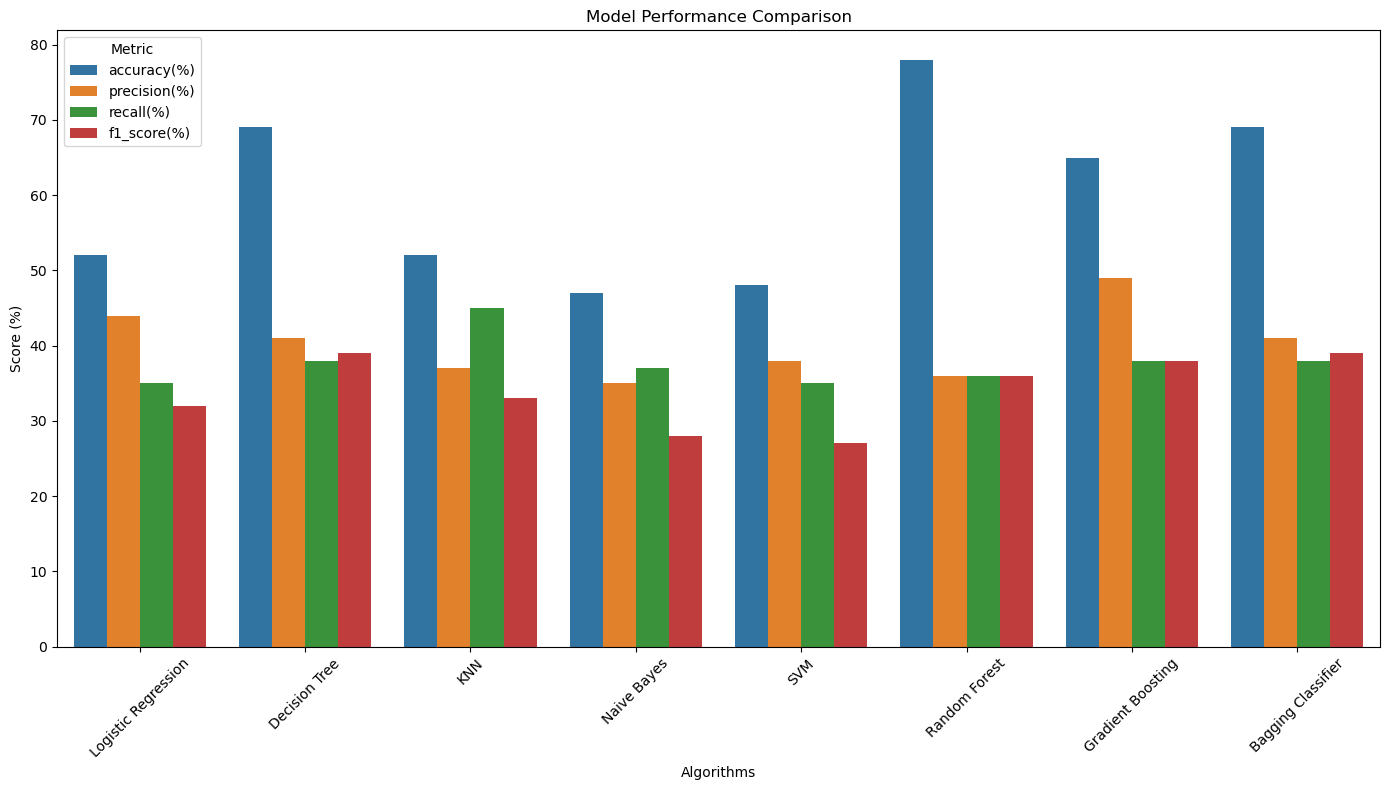

In [189]:
plt.figure(figsize=(14, 8))
sns.barplot(data=data_long, x='algorithms', y='Score', hue='Metric')
plt.title("Model Performance Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [191]:
data2={
    "algorithms":['Logistic Regression','Decision Tree','KNN','Naive Bayes','Random Forest'],
    "accuracy(%)":[55,68,76,47,79],
     "precision(%)":[46,41,68,35,38], 
      "recall(%)":[36,38,85,37,61],
       "f1_score(%)":[33,39,72,28,40]    }
data3=pd.DataFrame(data2)
data3

,algorithms,accuracy(%),precision(%),recall(%),f1_score(%)
0,Logistic Regression,55,46,36,33
1,Decision Tree,68,41,38,39
2,KNN,76,68,85,72
3,Naive Bayes,47,35,37,28
4,Random Forest,79,38,61,40


In [193]:
data_long1 = pd.melt(data3, id_vars='algorithms', 
                    var_name='Metric', value_name='Score')

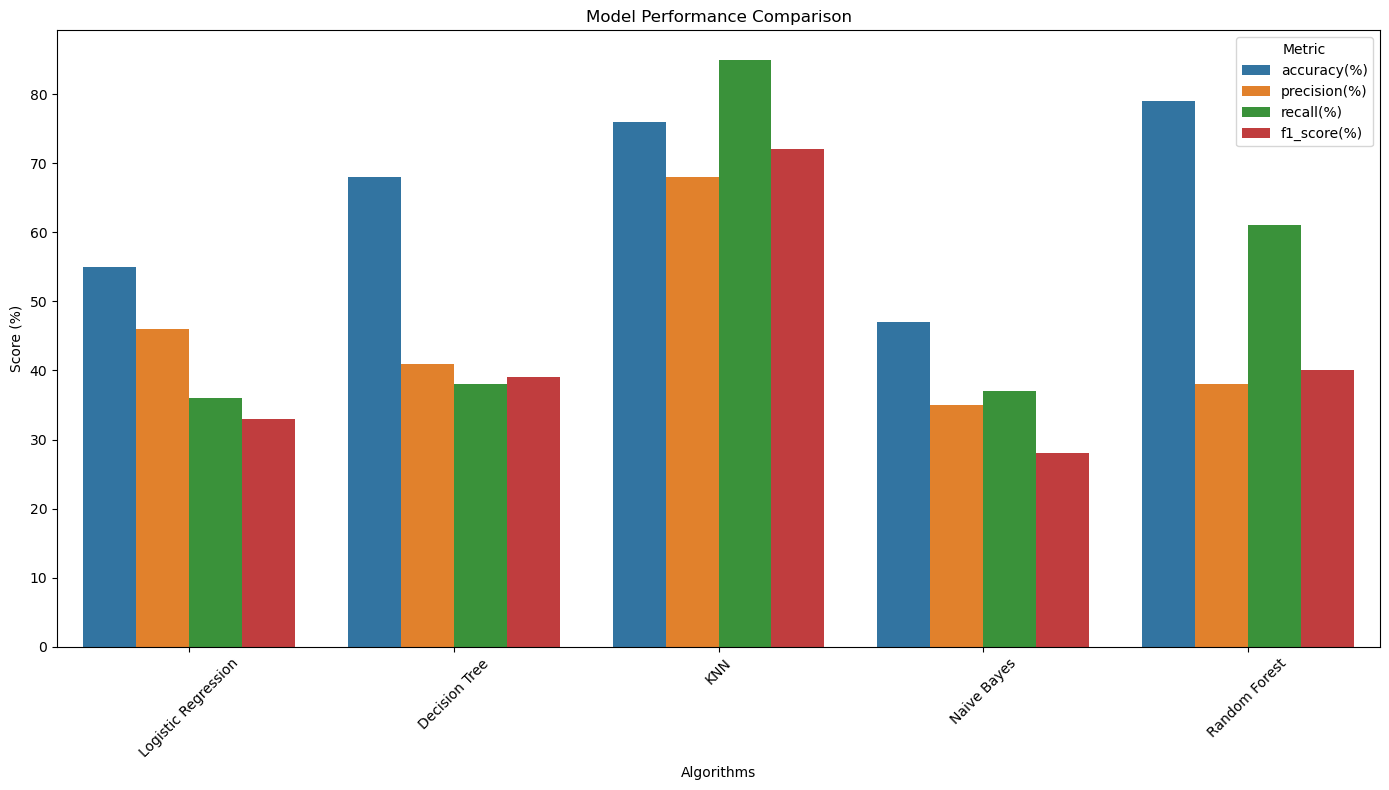

In [195]:
plt.figure(figsize=(14, 8))
sns.barplot(data=data_long1, x='algorithms', y='Score', hue='Metric')
plt.title("Model Performance Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [37]:
from flask import Flask, request, jsonify
import threading
import pickle
import requests

url = "http://127.0.0.1:5000/predict"
data = {"features": [5.1, 3.5, 1.4, 0.2]}  # replace with valid feature input
response = requests.post(url, json=data)
print(response.json())


# Load the model
with open("road_accident_model.pkl", "rb") as file:
    model = pickle.load(file)

app = Flask(__name__)

# ✅ Home route
@app.route("/", methods=["GET"])
def home():
    return "✅ Flask API is Running! Use POST /predict"

# ✅ Predict route
@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    features = data["features"]
    prediction = model.predict([features])
    return jsonify({"prediction": int(prediction[0])})

# ✅ Run Flask app (in a thread for Jupyter or notebook)
def run_app():
    app.run(debug=True, use_reloader=False)

threading.Thread(target=run_app).start()


127.0.0.1 - - [26/Jul/2025 15:16:27] "POST /predict HTTP/1.1" 200 -


{'prediction': 0}
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [39]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
